<h1 align=center>Final Tutorial - Relationship and Impacts of COVID on the Movie Industry</h1>
<h2 align=center>Venkat Gokaraju, Sean Tan, Tony Chen, Jahanzeb Hassan</h2>

COVID-19 has impacted the ways that many of us live our daily lives. In every aspect from the workplace to our home lives, many aspects have changed. However, one of the industry that was most heavily impacted by the coronavirus was the film and movie industry. As a result of many movies closing and the reliance that the film industry has on in-person "normal"-looking interaction for filming, they struggled to succeed during the pandemic. [ABC News](https://abcnews.go.com/US/covid-19-changed-movie-industry/story?id=78901700) wrote in July that "global theatric revenue in the U.S. fell from \$42.3 billion in 2019 to just \$12 billion in 2020".

However, we wanted to explore this further. How large of an impact did COVID have on the success of films? What did the growth of the movie industry look like before COVID, compared to during COVID? We wanted to find out more about the interactions between the movie industry and COVID.

<h2> Setup and Data Collection </h2>
Of course, we started with importing some libraries that would allow us to do analysis on our data.

In [2]:
import sqlite3 as sql, pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as pyplot, math
from matplotlib.ticker import FormatStrFormatter
import statsmodels.formula.api as smf

In order to begin analysis, we must first obtain data on the movie industry. We decided to focus on a very specific portion of data related to the movie industry - 

This data comes from [themoviedb.org](https://themoviedb.org). We selected movies fits the following criteria:

- Released between 2018 to 2021
- Released in United States, European Union, China, or Japan
- More than 100 people rated the movie
- Received a rating of more than 5
- Is at least 1 hour long

We got 550 movies for 2018, 604 movies for 2019, 463 movies for 2020, and 311 movies for 2021.

```sql
CREATE TABLE movies(
    id INTEGER PRIMARY KEY,
    title TEXT,
    release_date TEXT,
    adult BOOLEAN,
    popularity INTEGER,
    vote_average FLOAT,
    vote_count INTEGER,
    revenue INTEGER,
    budget INTEGER
)
```

In [3]:
movieDB = 'movie.db'
conn = sql.connect(movieDB)

# Queries movie.db for movie title, release date, popularity, vote average, vote count, revenue, and budget
sql_query = ''' \
    SELECT movies.title, movies.release_date, movies.popularity, movies.vote_average, movies.vote_count, movies.revenue, movies.budget
    FROM movies
'''

moviesDF = pd.read_sql(sql_query, conn)
moviesDF


,title,release_date,popularity,vote_average,vote_count,revenue,budget
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000
...,...,...,...,...,...,...,...
1925,Black Island,2021-08-18,89.923,6.2,111,0,0
1926,Jurassic Hunt,2021-08-24,293.261,5.0,155,0,0
1927,Schumacher,2021-09-15,28.985,7.4,187,0,0
1928,Hypnotic,2021-10-27,349.019,6.2,248,0,0


Now we will do some exploratory analysis of the information on movies in general.

,title,release_date,popularity,vote_average,vote_count,revenue,budget
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000
...,...,...,...,...,...,...,...
1765,PAW Patrol: The Movie,2021-08-20,577.741,7.7,678,135000000,26000000
1860,After We Fell,2021-09-30,1612.828,7.3,882,19000000,14000000
1864,Cry Macho,2021-09-17,64.973,6.5,289,11780000,33000000
1899,Zack Snyder's Justice League,2021-03-18,391.146,8.4,6850,657000000,70000000


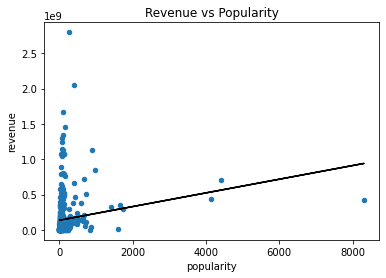

In [4]:
# Minor cleaning, remove movies with any 0s (generally these are unreleased movies)
moviesDF = moviesDF.loc[(moviesDF!=0).all(axis=1)]

# Plot popularity against revenue
ax1 = moviesDF.plot.scatter(x='popularity', y='revenue')
ax1.set_title("Revenue vs Popularity")

# Linear regression on popularity and revenue
popularityCol = moviesDF.loc[:, 'popularity']
revenueCol = moviesDF.loc[:, 'revenue']

m, b = np.polyfit(popularityCol, revenueCol, deg=1)

# Plot regression line
ax1.plot(popularityCol, m*popularityCol + b, color="black")

moviesDF

#The data here is very skewed towards low revenue, low popularity so we'll do a log transformation on the data to get a better visualization. 

-- Log Transformation, note that interpretation of coefficients becomes %'s --

<class 'pandas.core.series.Series'>


C:\Users\Venkat\AppData\Local\Temp/ipykernel_7364/767464893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesDF['log popularity'] = popularityColLog
C:\Users\Venkat\AppData\Local\Temp/ipykernel_7364/767464893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesDF['log revenue'] = revenueColLog


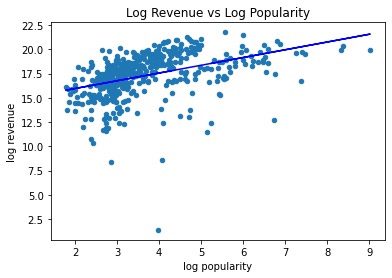

In [17]:
popularityColLog = [np.log(x) for x in popularityCol]
revenueColLog = [np.log(x) for x in revenueCol]

moviesDF['log popularity'] = popularityColLog
moviesDF['log revenue'] = revenueColLog

#Puts popularity and revenue into scatter plot
ax2 = moviesDF.plot.scatter(x='log popularity', y='log revenue')
ax2.set_title("Log Revenue vs Log Popularity")

popularityColLog = moviesDF.loc[:, 'log popularity']
revenueColLog = moviesDF.loc[:, 'log revenue']

print(type(popularityColLog))

#Gets regression line for popularity and revenue and plots it on to scatter plot
m, b = np.polyfit(popularityColLog, revenueColLog, deg=1)
ax2.plot(popularityColLog, m*popularityColLog + b, color="blue")

#From the scatter plot, we see a positive correlation between popularity and revenue. This means as popularity of a movie rises then its revenue will also rises. We had to do a log transformation
#of the data because most of the data was skewed towards low revenue and low popularity. This made the plot difficult to visualize. 

-- Pulling covid dataset, include information about source, reason to aggregate, etc etc --

-- Adding last 14 day cases count, and pre/post covid to movie df --

In [6]:
# Reads covid19 worldwide cases csv file
cases_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# Aggregating data as we will focus on just aggregate information by date
cases_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)
deaths_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)

cumulative_cases = cases_COVID.sum(axis=0)
cumulative_deaths = deaths_COVID.sum(axis=0)

# Calculate daily new cases & deaths
daily_new_cases = cumulative_cases.copy()
daily_new_deaths = cumulative_deaths.copy()
two_week_cases = cumulative_cases.copy()

covid_DF = pd.concat([cumulative_cases, daily_new_cases, two_week_cases, cumulative_deaths, daily_new_deaths], axis=1)
covid_DF.columns = ['cumulative_cases', 'daily_new_cases', 'two_week_cases', 'cumulative_deaths', 'daily_new_deaths']

# Reset index for calculations
covid_DF.reset_index(inplace=True)

# Daily Cases/Deaths
for i in range(1, len(covid_DF)):
    covid_DF.loc[i,'daily_new_cases'] = covid_DF.loc[i,'cumulative_cases'] - covid_DF.loc[i-1,'cumulative_cases']
    covid_DF.loc[i,'daily_new_deaths'] = covid_DF.loc[i,'cumulative_deaths'] - covid_DF.loc[i-1,'cumulative_deaths']
covid_DF.loc[0,'daily_new_cases'] = covid_DF.loc[0,'cumulative_cases']
covid_DF.loc[0,'daily_new_deaths'] = covid_DF.loc[0,'cumulative_deaths']

# Two Week Cases
running_sum = 0
for i in range(0, 14):
    running_sum = running_sum + covid_DF.loc[i,'daily_new_cases']
    covid_DF.loc[i, 'two_week_cases'] = running_sum
for i in range(14, len(covid_DF)):
    running_sum = running_sum - covid_DF.loc[i-14, 'daily_new_cases'] + covid_DF.loc[i,'daily_new_cases']
    covid_DF.loc[i, 'two_week_cases'] = running_sum

covid_DF.set_index('index', inplace=True)
covid_DF

,cumulative_cases,daily_new_cases,two_week_cases,cumulative_deaths,daily_new_deaths
index,,,,,
1/22/20,557,557,557,17,17
1/23/20,655,98,655,18,1
1/24/20,941,286,941,26,8
1/25/20,1434,493,1434,42,16
1/26/20,2118,684,2118,56,14
...,...,...,...,...,...
12/9/21,268558598,724257,8490247,5287902,8700
12/10/21,269250556,691958,8587038,5296051,8149
12/11/21,269739121,488565,8624763,5301760,5709


-- Pull info from COVID DF into movies DF --

In [7]:
moviesDF.loc[:,'cumulative_cases'] = [0] * len(moviesDF)
moviesDF.loc[:,'daily_new_cases'] = [0] * len(moviesDF)
moviesDF.loc[:,'cumulative_deaths'] = [0] * len(moviesDF)
moviesDF.loc[:,'daily_new_deaths'] = [0] * len(moviesDF)
moviesDF.loc[:,'during_covid'] = [False] * len(moviesDF)

for i, row in moviesDF.iterrows():
    curr_date = row['release_date'].split('-')
    curr_date[0] = curr_date[0][len(curr_date[0])//2:]
    date = str(int(curr_date[1])) + '/' + curr_date[2] + '/' + curr_date[0]
    try:
        covid_row = covid_DF.loc[date]
        moviesDF.loc[i, 'cumulative_cases'] = covid_row.loc['cumulative_cases']
        moviesDF.loc[i, 'daily_new_cases'] = covid_row.loc['daily_new_cases']
        moviesDF.loc[i, 'cumulative_deaths'] = covid_row.loc['cumulative_deaths']
        moviesDF.loc[i, 'daily_new_deaths'] = covid_row.loc['daily_new_deaths']
        moviesDF.loc[i, 'during_covid'] = True
    except KeyError:
        pass

moviesDF


C:\Users\Venkat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Venkat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,title,release_date,popularity,vote_average,vote_count,revenue,budget,log popularity,log revenue,cumulative_cases,daily_new_cases,cumulative_deaths,daily_new_deaths,during_covid
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000,4.293919,19.871135,0,0,0,0,False
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000,2.521801,16.752059,0,0,0,0,False
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000,3.213381,18.537574,0,0,0,0,False
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000,4.120808,20.064572,0,0,0,0,False
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000,4.128408,20.794790,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PAW Patrol: The Movie,2021-08-20,577.741,7.7,678,135000000,26000000,6.359126,18.720785,211363932,790138,4415353,10464,True
1860,After We Fell,2021-09-30,1612.828,7.3,882,19000000,14000000,7.385744,16.759950,234209471,484766,4784875,8837,True
1864,Cry Macho,2021-09-17,64.973,6.5,289,11780000,33000000,4.173972,16.281914,228085684,593543,4679905,8688,True
1899,Zack Snyder's Justice League,2021-03-18,391.146,8.4,6850,657000000,70000000,5.969081,20.303195,122176750,543903,2775706,10725,True


-- Advanced Regression Models --

popularity v cases

popularity v death rates

revenue v cases


In [8]:
pop_by_case = smf.ols('popularity~cumulative_cases', data=moviesDF).fit()
print(pop_by_case.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     21.84
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           3.92e-06
Time:                        00:14:18   Log-Likelihood:                -3431.3
No. Observations:                 449   AIC:                             6867.
Df Residuals:                     447   BIC:                             6875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           84.8673     25.585  

<class 'list'>


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

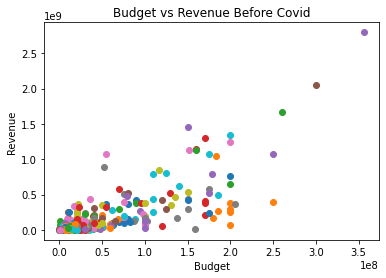

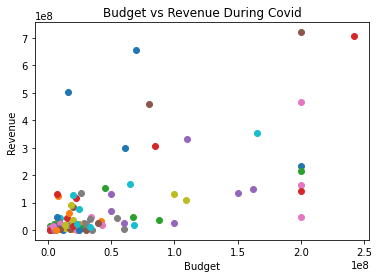

In [15]:
#Analyzing the relationship (if any) between revenue and budget before and after covid.

revenueDuringCovid = []
revenueBeforeCovid = []
budgetDuringCovid = []
budgetBeforeCovid = []

fig1, ax1 = pyplot.subplots() # revenue vs budget before covid scatter plot
fig2, ax2 = pyplot.subplots() # revenue vs budget during covoid scatter plot

#Plots revenue and budget data on to either the revenue vs budget before covid scatter plot or revenue vs budget
#during covid scatter plot. 
for i, row in moviesDF.iterrows():
    revenue = int(moviesDF.at[i, 'revenue'])
    budget = int(moviesDF.at[i, 'budget'])
    if moviesDF.at[i, 'during_covid']:
        revenueDuringCovid.append(revenue)
        budgetDuringCovid.append(budget)
        ax2.scatter(budget, revenue)
    else:
        revenueBeforeCovid.append(revenue)
        budgetBeforeCovid.append(budget)
        ax1.scatter(budget, revenue)


ax1.set_title("Budget vs Revenue Before Covid")
ax1.set_xlabel("Budget")
ax1.set_ylabel("Revenue")

ax2.set_title("Budget vs Revenue During Covid")
ax2.set_xlabel("Budget")
ax2.set_ylabel("Revenue")

m1, b1 = np.polyfit(budgetBeforeCovid, revenueBeforeCovid, deg=1)
#Plot regression line
ax1.plot(budgetBeforeCovid, m1*budgetBeforeCovid + b1, color="black")

m2, b2 = np.polyfit(budgetDuringCovid, revenueDuringCovid, deg=1)
#Plot regression line
ax2.plot(budgetDuringCovid, m2*budgetDuringCovid + b2, color="black")


From the plot titled, "Budget vs Revenue Before Covid" we see a positive correlation between budget and revenue. This means that before Covid appeared, movies with larger budgets resulted in larger revenue. On the other hand, from the plot titled, "Budget vs Revenue During Covid" we don't see much of a correlation. Multiple data points are scattered through out the plot and so it doesn't show a clear relationship between budget and revenue during Covid. This could indicate that Covid disrupted the movie industry and their revenue streams. We also see that budget is lower for movies during Covid in comparison to movies released before covid. This makes sense as lockdowns forced movie theatres to close down which negatively affects the sales of movies being released at that time. However, we do see some movies who have high revenues and this could possibly be due to the movies being released through movie streaming platforms which exploded in popularity during the pandemic. 